<a href="https://colab.research.google.com/github/Arsat-1/Arsat-1/blob/main/GCBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [ ]:
recorridos_2021 = pd.read_csv("/content/recorridos-realizados-2021.csv")
recorridos_2021.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE


In [ ]:
recorridos_2021.tail()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
1328721,9646396,NORMAL,690,277,2021-01-01 00:09:43,292 - PLAZA BOLIVIA,2021-01-01 00:21:13,44.0,044 - Ecoparque,62246,MEMBER,ICONIC,CODE
1328722,9646395,NORMAL,1360,79,2021-01-01 00:08:40,079 - AZUCENA VILLAFLOR,2021-01-01 00:31:20,168.0,168 - Estados Unidos,445201,MEMBER,ICONIC,CODE
1328723,9646394,NORMAL,1169,79,2021-01-01 00:08:37,079 - AZUCENA VILLAFLOR,2021-01-01 00:28:06,8.0,008 - Congreso,554162,MEMBER,ICONIC,CODE
1328724,9646393,NORMAL,1031,79,2021-01-01 00:06:50,079 - AZUCENA VILLAFLOR,2021-01-01 00:24:01,75.0,075 - Plaza Primero de Mayo,51005,MEMBER,ICONIC,CODE
1328725,9646392,NORMAL,1795,79,2021-01-01 00:04:26,079 - AZUCENA VILLAFLOR,2021-01-01 00:34:21,207.0,123 - Armenia,734428,MEMBER,ICONIC,CODE


In [ ]:
localizaciones = pd.read_csv("/content/nuevas-estaciones-bicicletas-publicas.csv")

In [ ]:
caba = gpd.read_file("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson")

In [ ]:
estaciones_babici = gpd.read_file('/content/estaciones_de_bicicletas_WGS84.shp')

¿Que filas tienen valores **NaN** en sus columnas?

In [ ]:
df1 = recorridos_2021[recorridos_2021.isna().any(axis=1)]
df1

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
124010,11054021,TERMINATED,0,33,2021-05-12 14:16:36,033 - Facultad de Medicina,2021-05-12 14:16:36,NaN,NaN,718500,MEMBER,ICONIC,CODE
394023,10729878,TERMINATED,0,359,2021-04-07 12:49:51,250 - Fleni,2021-04-07 12:49:51,NaN,NaN,753996,MEMBER,ICONIC,CODE
435319,10679335,TERMINATED,0,432,2021-04-01 12:35:53,187 - Jose Maria Moreno,2021-04-01 12:35:53,NaN,NaN,141425,MEMBER,ICONIC,CODE


Solo 3 **124010** **394023** y **435319**. Parecen ser viajes que no se efectuaron finalmente.

In [ ]:
recorridos_2021 = recorridos_2021.dropna()

In [ ]:
df1 = recorridos_2021[recorridos_2021.isna().any(axis=1)]
df1

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje


Compruebo de que ya no hay casos con **NaN**

Información del Data Frame

In [ ]:
recorridos_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328723 entries, 0 to 1328725
Data columns (total 13 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ID                                  1328723 non-null  int64  
 1   Estado cerrado                      1328723 non-null  object 
 2   Duración                            1328723 non-null  int64  
 3   Id de estación de inicio            1328723 non-null  int64  
 4   Fecha de inicio                     1328723 non-null  object 
 5   Nombre de estación de inicio        1328723 non-null  object 
 6   Fecha de fin                        1328723 non-null  object 
 7   Id de estación de fin de viaje      1328723 non-null  float64
 8   Nombre de estación de fin de viaje  1328723 non-null  object 
 9   ID de ciclista                      1328723 non-null  int64  
 10  Tipo de ciclista                    1328723 non-null  object 
 11  Modelo de b

Transformo la Columna de 'Id de estacion de fin de viaje' a int64 para que comparta el tipo de columna con la de 'Id de estación de inicio'

In [ ]:
recorridos_2021['Id de estación de fin de viaje'] = recorridos_2021['Id de estación de fin de viaje'].astype(np.int64)

Corrijo los nombres de las columnas que refieren a la estación para que tengan el mismo formato

In [ ]:
recorridos_2021.rename(columns={'Id de estación de inicio': 'Id de estación de inicio de viaje', 'Nombre de estación de inicio': 'Nombre de estación de inicio de viaje'}, inplace=True)

Transformo las columnas que tienen datos de fecha pero estan como objeto

In [ ]:
recorridos_2021['Fecha de inicio'] = pd.to_datetime(recorridos_2021['Fecha de inicio'])
recorridos_2021['Fecha de fin'] = pd.to_datetime(recorridos_2021['Fecha de fin'])

Valores unicos por columna

In [ ]:
for col in recorridos_2021:
    print(col)
    print(recorridos_2021[col].unique())

ID
[11204995 11204938 11204928 ...  9646394  9646393  9646392]
Estado cerrado
['NORMAL' 'FORCED_CLOSED' 'TERMINATED' 'BIKE_SEEN']
Duración
[  437   406   299 ... 19355 20560 46903]
Id de estación de inicio de viaje
[131 387 232 117 212 161 179 261 190  65  82 359  64 121 425 162 372 200
 202  74 194 174  22   3 172 299 239 284   7 273 111 268 183 255 206 263
 203 227 433  93 329 132  30 112 189  84  87 231 163 216 222 275  94 156
 118 441 242   5 116 135   8  96 376 187  14  70 167 392 291 449 213  17
 353  83 403   4 153 182 158  91  27 171  54 235 248 322  25   9 150 223
 355  76  89  92  20  29 204 236  58  45  56 364 435  33 166 120  69  36
  41 130 104 277 333 386  75   6 281 210 316 144 137 269 101  44 432 254
  99  80 181 169 128  23  12 229 175 165 278  85 155  49 257 262  50 400
 124 308 214 361 146 215  71 252  66  46  95 151 407 220 245  63 271 370
 186 230 304  35  60  86  24 280 424 444 149 448 168 323 342 152 358 302
 289 107 193 138  32 247 196  73 184 382 335 426  13 31

Chequeo si los Id de cada viaje son únicos

In [ ]:
recorridos_2021.duplicated(subset='ID', keep='first').sum()

0

Efectivamente son unicos

In [ ]:
recorridos_2021['Duración'].describe()

count    1.328723e+06
mean     1.213856e+03
std      5.711497e+03
min      0.000000e+00
25%      6.490000e+02
50%      1.030000e+03
75%      1.531000e+03
max      5.513940e+06
Name: Duración, dtype: float64

In [ ]:
media_hora = recorridos_2021[recorridos_2021['Duración'] <= 1800]
media_hora['Duración'].mean()

936.1154413911978

In [ ]:
y = recorridos_2021[recorridos_2021['Duración'] == 2]
y['Estado cerrado'].value_counts()

FORCED_CLOSED    10647
Name: Estado cerrado, dtype: int64

In [ ]:
z = recorridos_2021[recorridos_2021['Duración'] == 0]
z['Estado cerrado'].value_counts()

TERMINATED    12
Name: Estado cerrado, dtype: int64

Todos los viajes que duran 2 segundos corresponden al estado cerrado "FORCED_CLOSED" y los que duran 0 segundos corresponden al estado "TERMINATED"

In [ ]:
recorridos_2021 = recorridos_2021[recorridos_2021['Estado cerrado'] != "FORCED_CLOSED"]
recorridos_2021 = recorridos_2021[recorridos_2021['Estado cerrado'] != "TERMINATED"]

Elimino los casos que no fueron viajes efectivamente.

In [ ]:
recorridos_2021['ID'].count()

1318064

En lo que va del año 2021 se realizaron **1.318.064** viajes en 🚲

Ubicacion de estaciones

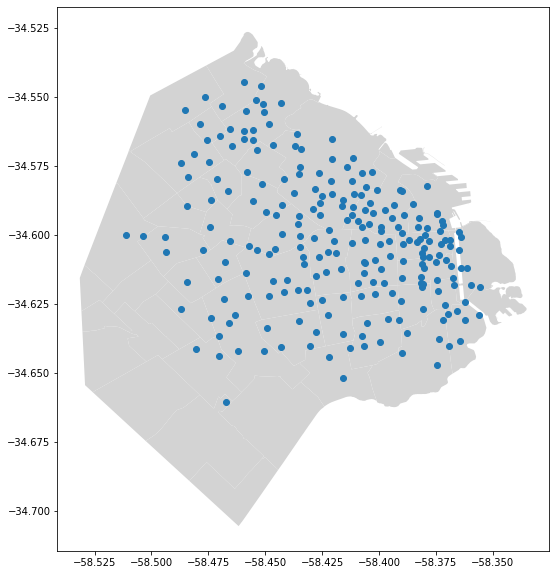

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
caba.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
estaciones_babici.plot(ax=ax)

¿Hay alguna estacion que este contemplada en inicio y no en fin o viceversa?

In [ ]:
estaciones_ini = recorridos_2021['Id de estación de inicio de viaje'].unique()
estaciones_fin = recorridos_2021['Id de estación de fin de viaje'].unique()
estaciones_ini = sorted(estaciones_ini)
estaciones_fin = sorted(estaciones_fin)

list_difference = [item for item in estaciones_ini if item not in estaciones_fin]
print(list_difference)
list_difference2 = [item for item in estaciones_fin if item not in estaciones_ini]
print(list_difference2)

[]
[288, 447]


In [ ]:
for item in list_difference2 : print(estaciones_fin.count(item)) 

1
1


Osea que hay 4 casos de estaciones donde solo se finalizan viajes. Que son las siguientes:

In [ ]:
nombre_estaciones_solofin = []
for item in list_difference2 : nombre_estaciones_solofin.append(recorridos_2021.loc[recorridos_2021['Id de estación de fin de viaje'] == item].iloc[0]['Nombre de estación de fin de viaje'])
nombre_estaciones_solofin

['333 - MIRO', 'Balboa Definitivo']

Para ubicarlas voy a ver cuales estan localizadas en el archivo de localizaciones

In [ ]:
estaciones_solofin = localizaciones[localizaciones['nombre'].isin(nombre_estaciones_solofin)]

In [ ]:
estaciones_solofin

,WKT,id,codigo,nombre,ubicacion,tipo,horario,anclajes_t
177,POINT (-58.4429507721387 -34.6404899809383),257,333,333 - MIRO,1684 Miro,AUTOMÁTICA,Estación automática: disponibilidad las 24 horas,19


Solo encontre 1, '333 - MIRO'

In [ ]:
estaciones_solofin['geometry'] = estaciones_solofin.WKT.apply(wkt.loads)
estaciones_solofin.drop('WKT', axis=1, inplace=True) #Drop WKT column

# Geopandas GeoDataFrame
estaciones_solofin_gdf = gpd.GeoDataFrame(estaciones_solofin, geometry='geometry')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


¿Donde esta ubicada?

In [ ]:
chacabuco = caba.loc[caba['barrio'] == 'PARQUE CHACABUCO']
chacabuco = gpd.GeoDataFrame(chacabuco, geometry='geometry')

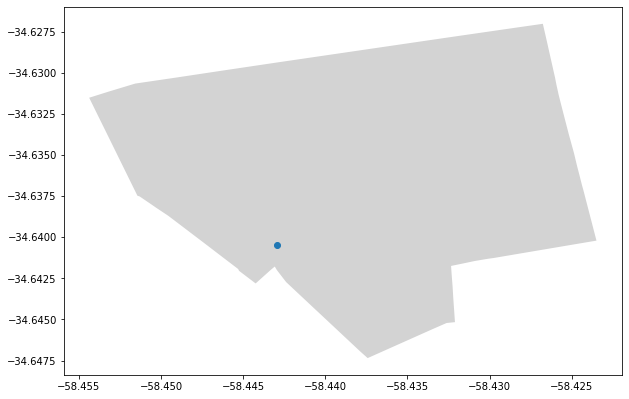

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
chacabuco.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
estaciones_solofin_gdf.plot(ax=ax)

Las estaciones que solo se encuentran en el listado de finalizadas indican que no se originan viajes alli, podrian ser tenidas en cuenta para abastecer a otras estaciones de las bicicletas que se dejan allí

¿Cuales son las 10 estaciones mas usadas a la hora de comenzar un viaje?

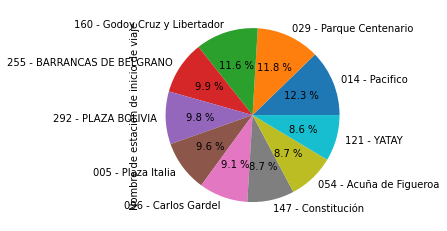

In [ ]:
temp1 = recorridos_2021['Nombre de estación de inicio de viaje'].value_counts()
temp2 = temp1.head(10)
temp2.plot(kind='pie', autopct="%0.1f %%")

¿Y a la hora de terminarlo?

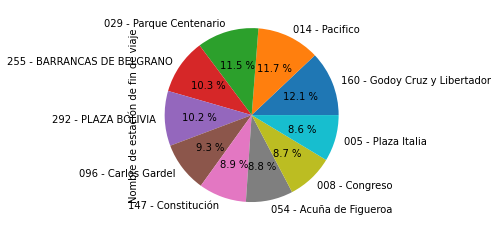

In [ ]:
temp3 = recorridos_2021['Nombre de estación de fin de viaje'].value_counts()
temp4 = temp3.head(10)
temp4.plot(kind='pie', autopct="%0.1f %%")

In [ ]:
recorridos_2021.sort_values('Duración', ascending=False)

,ID,Estado cerrado,Duración,Id de estación de inicio de viaje,Fecha de inicio,Nombre de estación de inicio de viaje,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
1229340,9761816,NORMAL,5513940,96,2021-01-12 18:38:43,096 - Carlos Gardel,2021-03-17 14:17:43,447,Balboa Definitivo,632395,MEMBER,ICONIC,CODE
684378,10388494,NORMAL,2279434,73,2021-03-05 00:36:21,073 - Ruy Díaz de Guzmán,2021-03-31 09:46:55,447,Balboa Definitivo,371967,MEMBER,ICONIC,CODE
1250661,9736741,NORMAL,1679501,116,2021-01-10 03:56:18,116 - HOSPITAL ALEMÁN,2021-01-29 14:27:59,447,Balboa Definitivo,736556,MEMBER,ICONIC,CODE
939905,10098315,NORMAL,932638,199,2021-02-11 18:12:03,199 - ESTADOS UNIDOS Y BOEDO,2021-02-22 13:16:01,447,Balboa Definitivo,709887,MEMBER,ICONIC,CODE
1118835,9890068,NORMAL,843018,252,2021-01-23 21:52:50,331 - CALIFORNIA,2021-02-02 16:03:08,447,Balboa Definitivo,524644,MEMBER,ICONIC,CODE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374492,10752998,TERMINATED,0,64,2021-04-09 17:39:13,064 - RIOBAMBA,2021-04-09 17:39:13,447,Balboa Definitivo,763506,MEMBER,ICONIC,CODE
614626,10467676,TERMINATED,0,3,2021-03-10 12:21:06,003 - ADUANA,2021-03-10 12:21:06,35,035 - INGENIERO BUTTY,175538,MEMBER,ICONIC,CODE
125783,11052031,TERMINATED,0,120,2021-05-12 11:20:25,120 - HOSPITAL RAMOS MEJIA,2021-05-12 11:20:25,181,181 - BILLINGHURST Y MANSILLA,666762,MEMBER,ICONIC,CODE
388700,10735789,TERMINATED,0,284,2021-04-07 19:58:02,229 - RIGLOS,2021-04-07 19:58:02,261,272 - Plaza Bruno Giordano,539229,MEMBER,ICONIC,CODE


In [ ]:
x = recorridos_2021['Duración']/60

In [ ]:
x.describe()

count    1.318076e+06
mean     2.039408e+01
std      9.555793e+01
min      0.000000e+00
25%      1.096667e+01
50%      1.728333e+01
75%      2.561667e+01
max      9.189900e+04
Name: Duración, dtype: float64

In [ ]:
x.max()

91899.0

El viaje de duración mas larga es de 63 dias

In [ ]:
x.mean()

20.394080791496716

El viaje promedio es de 20 minutos

In [ ]:
recorridos_2021['Hora de inicio (round)'] = recorridos_2021['Fecha de inicio'].values.astype('<M8[h]')
recorridos_2021['Hora de inicio (round)'] = pd.to_datetime(recorridos_2021['Hora de inicio (round)'], format='%H:%M').dt.hour

In [ ]:
recorridos_2021['Hora de fin (round)'] = recorridos_2021['Fecha de fin'].values.astype('<M8[h]')
recorridos_2021['Hora de fin (round)'] = pd.to_datetime(recorridos_2021['Hora de fin (round)'], format='%H:%M').dt.hour

In [ ]:
recorridos_2021['Hora de fin (round)'].mode()

0    18
dtype: int64

In [ ]:
recorridos_2021['Hora de inicio (round)'].mode()

0    18
dtype: int64

El horario mas utilizado es el de las 18hs

¿Como es la distribucion de horarios?

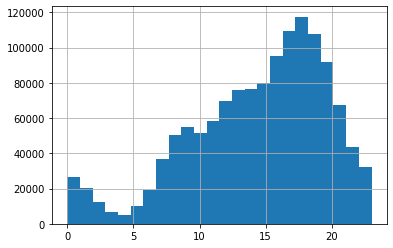

In [ ]:
recorridos_2021['Hora de fin (round)'].hist(bins=24)

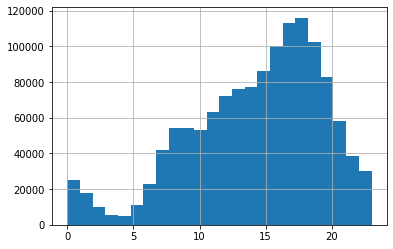

In [ ]:
recorridos_2021['Hora de inicio (round)'].hist(bins=24)

In [ ]:
recorridos_2021['Fecha de inicio (truncada)'] = recorridos_2021['Fecha de inicio'].dt.date
recorridos_2021['Fecha de fin (truncada)'] = recorridos_2021['Fecha de fin'].dt.date

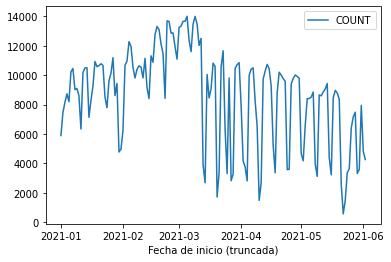

In [ ]:
agrupamiento_fecha_inicio = recorridos_2021.groupby(['Fecha de inicio (truncada)']).count()
agrupamiento_fecha_inicio = agrupamiento_fecha_inicio[['ID']]
agrupamiento_fecha_inicio.rename(columns={'ID': 'COUNT'}, inplace=True)
agrupamiento_fecha_inicio.plot()

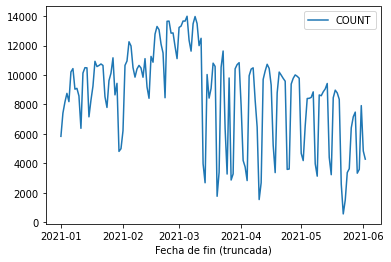

In [ ]:
agrupamiento_fecha_fin = recorridos_2021.groupby(['Fecha de fin (truncada)']).count()
agrupamiento_fecha_fin = agrupamiento_fecha_fin[['ID']]
agrupamiento_fecha_fin.rename(columns={'ID': 'COUNT'}, inplace=True)
agrupamiento_fecha_fin.plot()

Pareceria que hay un mayor uso en verano hasta mediados de marzo

In [ ]:
recorridos_2021['Dia de inicio'] = recorridos_2021['Fecha de inicio'].dt.day_name()

In [ ]:
agrupamiento_dias = recorridos_2021[['ID', 'Dia de inicio']]
agrupamiento_dias = agrupamiento_dias.groupby(['Dia de inicio']).count()
agrupamiento_dias.sort_values(by=['ID'], ascending=False)

,ID
Dia de inicio,
Wednesday,221731
Tuesday,218126
Thursday,207718
Friday,205720
Monday,202665
Saturday,133548
Sunday,128568


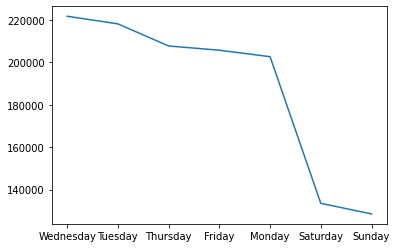

In [ ]:
recorridos_2021['Dia de inicio'].value_counts().plot()

Los miercoles parecen ser los dias mas usados

¿Hay viajes que empiezan y terminan en la misma estación?

In [ ]:
recorridos_2021['roundtrip'] = recorridos_2021['Id de estación de inicio de viaje'] == recorridos_2021['Id de estación de fin de viaje']

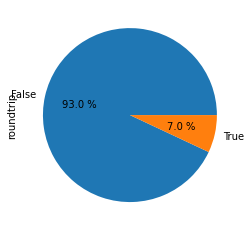

In [ ]:
recorridos_2021['roundtrip'].value_counts().plot(kind='pie', y='counts', autopct="%0.1f %%")

Un 7% de los viajes empiezan y terminan en la misma estación.

In [ ]:
roundtrip = recorridos_2021.loc[recorridos_2021['roundtrip'] == True].copy()
roundtrip = roundtrip[['ID','Duración','Nombre de estación de inicio de viaje','Nombre de estación de fin de viaje']]

In [ ]:
roundtrip['Nombre de estación de inicio de viaje'].value_counts().head(10)

152 - JULIETA LANTERI            2741
399 - GARCIA DEL RIO             2331
160 - Godoy Cruz y Libertador    2124
292 - PLAZA BOLIVIA              2121
029 - Parque Centenario          2041
335 - General Urquiza            1512
005 - Plaza Italia               1463
014 - Pacifico                   1360
255 - BARRANCAS DE BELGRANO      1296
350 - Plaza Irlanda              1266
Name: Nombre de estación de inicio de viaje, dtype: int64

In [ ]:
roundtrip.groupby('Nombre de estación de inicio de viaje').size().sort_values(ascending=False).reset_index(name='count')

,Nombre de estación de inicio de viaje,count
0,152 - JULIETA LANTERI,2741
1,399 - GARCIA DEL RIO,2331
2,160 - Godoy Cruz y Libertador,2124
3,292 - PLAZA BOLIVIA,2121
4,029 - Parque Centenario,2041
...,...,...
228,169 - FACULTAD DE PSICOLOGIA,23
229,213 - Hospital Alvear,21
230,105 - 15 DE NOVIEMBRE,17
231,348 - Villa del Parque,4


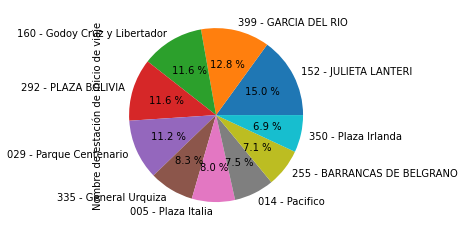

In [ ]:
roundtrip['Nombre de estación de inicio de viaje'].value_counts().head(10).plot(kind='pie', autopct="%0.1f %%")